In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE #address the class imbalance
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
df= pd.read_csv('train.csv')
df.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
458,459,1,1,1,0,1,0,1,1,1,...,f,White-European,no,no,New Zealand,no,11.915738,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
374,375,0,0,0,0,0,0,0,1,0,...,m,Middle Eastern,no,no,New Zealand,no,-0.472551,18 and more,Self,0
783,784,1,1,1,1,1,1,1,0,1,...,f,White-European,no,yes,Bangladesh,no,12.610653,18 and more,Self,0
131,132,0,0,0,0,0,0,0,1,1,...,m,?,no,yes,New Zealand,no,-1.358064,18 and more,Parent,0


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
df['age']= df['age'].astype(int)

In [9]:
for col in df.columns:
  colu=['ID','age','result' ]
  if col not in colu:
    print(col ,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [10]:
df= df.drop(columns= ['ID', 'age_desc'])

In [11]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [12]:
mapping={
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
df['contry_of_res']= df['contry_of_res'].replace(mapping)

In [13]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [14]:
sns.set_theme(style= "darkgrid")

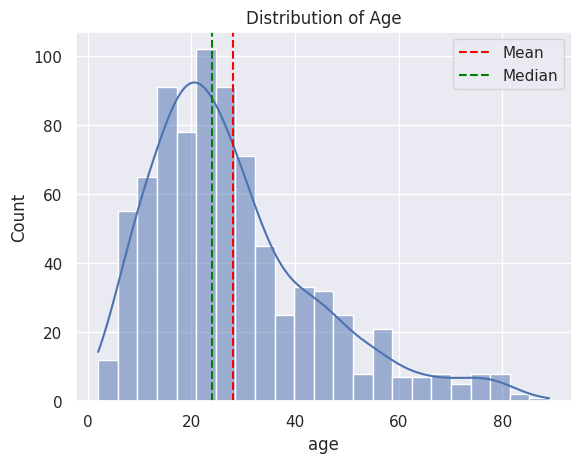

In [15]:
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")

age_mean= df['age'].mean()
age_median= df['age'].median()

#adding vertical lines
plt.axvline(age_mean, color="red", linestyle="dashed", label="Mean")
plt.axvline(age_median, color="green", linestyle="dashed", label="Median")

plt.legend()

plt.show()
#


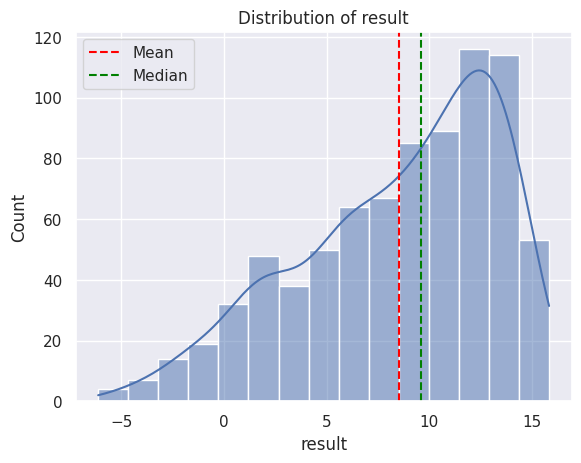

In [16]:
sns.histplot(df['result'], kde=True)
plt.title("Distribution of result")

age_mean= df['result'].mean()
age_median= df['result'].median()

#adding vertical lines
plt.axvline(age_mean, color="red", linestyle="dashed", label="Mean")
plt.axvline(age_median, color="green", linestyle="dashed", label="Median")

plt.legend()

plt.show()
#

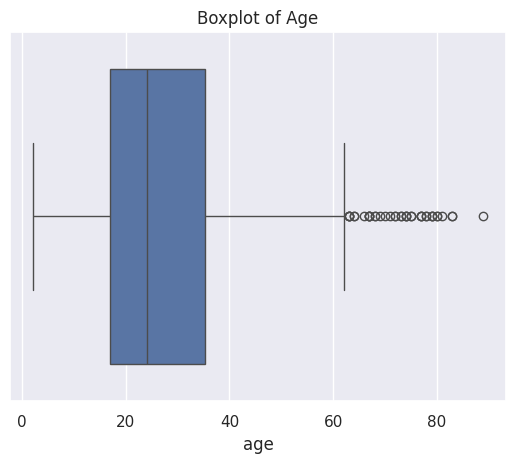

In [17]:
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

<Axes: xlabel='result'>

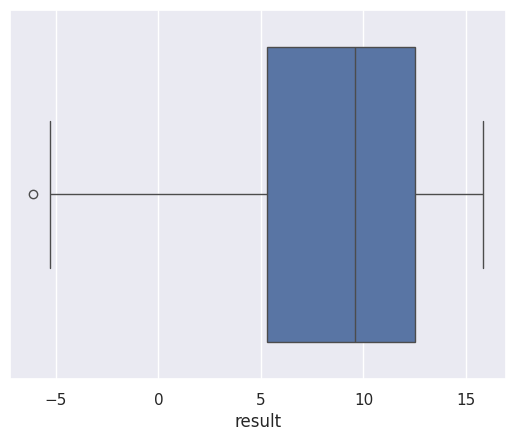

In [18]:
sns.boxplot(x=df['result'])

In [19]:
# Getting the outliers
Q1= df['age'].quantile(.25)
Q3= df['age'].quantile(.77)
IQR= Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

age_outliers= df[(df['age']<lower_bound) | (df['age']>upper_bound)]
len(age_outliers)

28

In [20]:
# Getting the outliers
Q1= df['result'].quantile(.25)
Q3= df['result'].quantile(.77)
IQR= Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

result_outliers= df[(df['result']<lower_bound) | (df['result']>upper_bound)]
len(result_outliers)

1

In [21]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

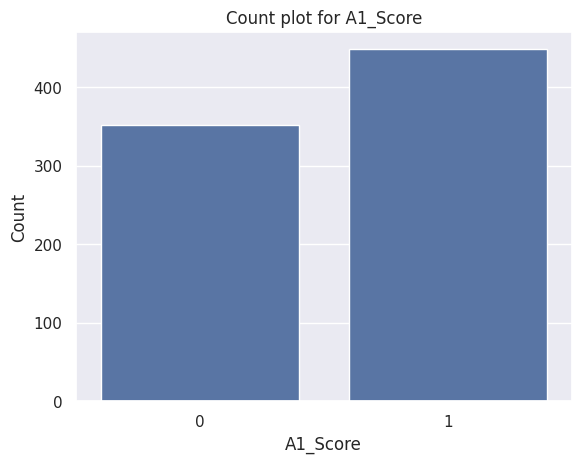

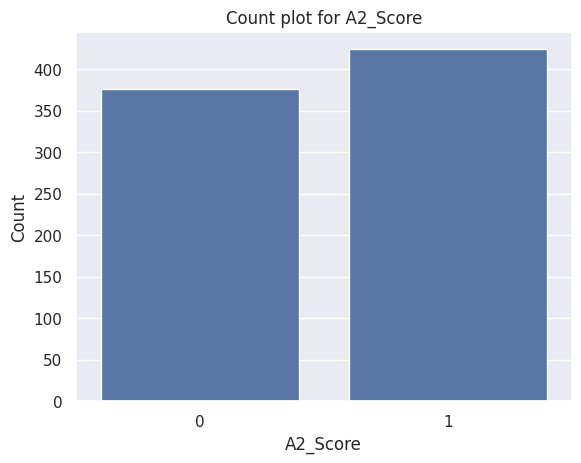

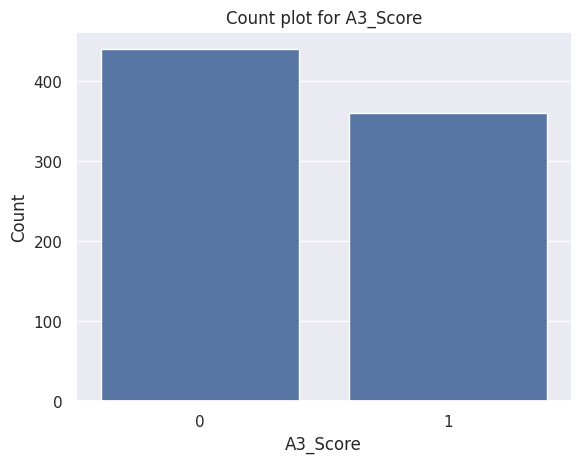

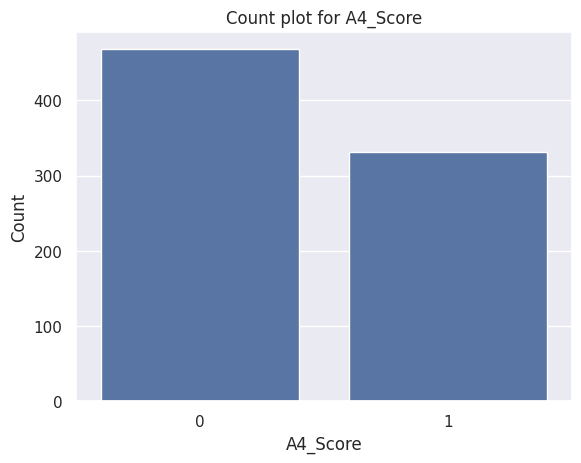

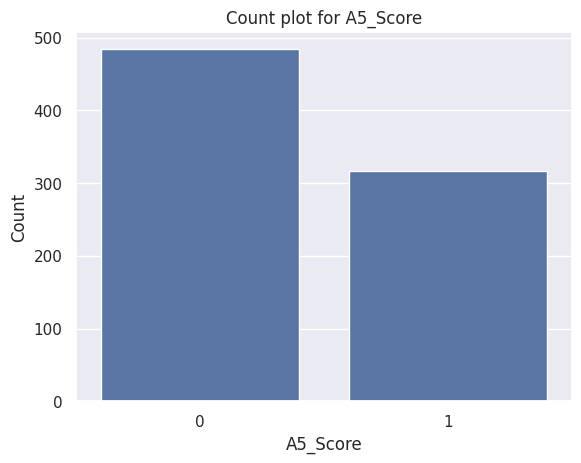

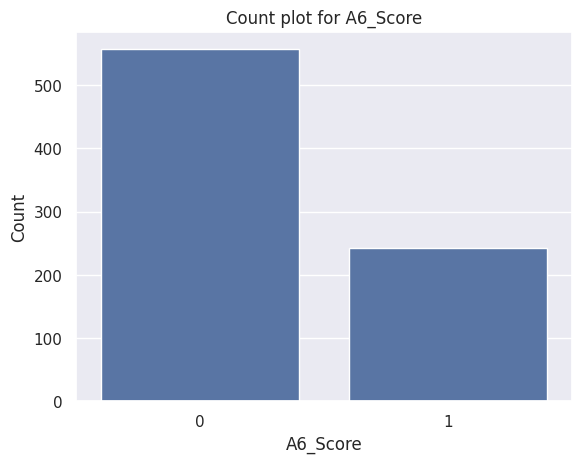

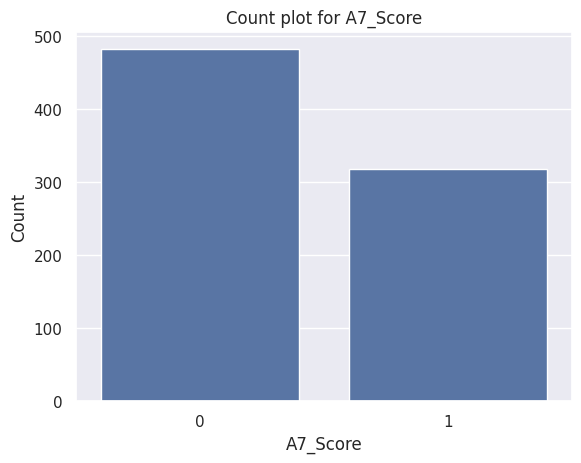

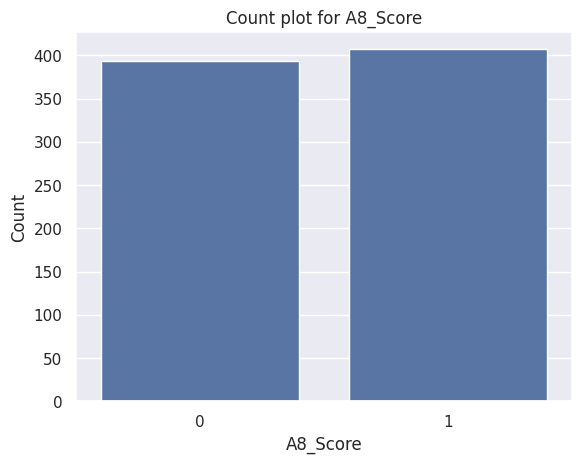

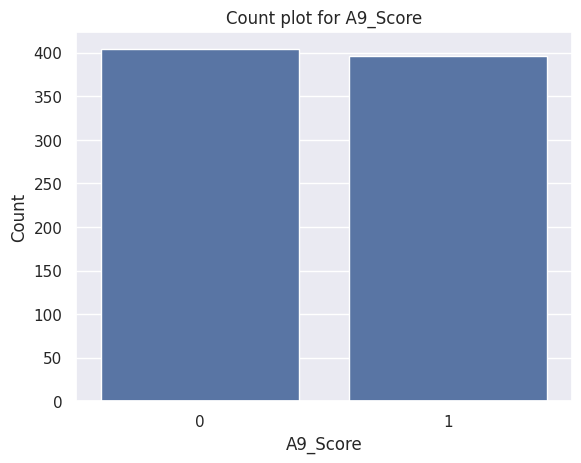

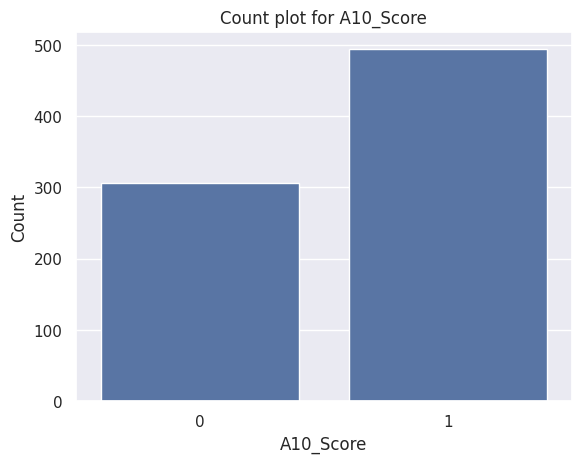

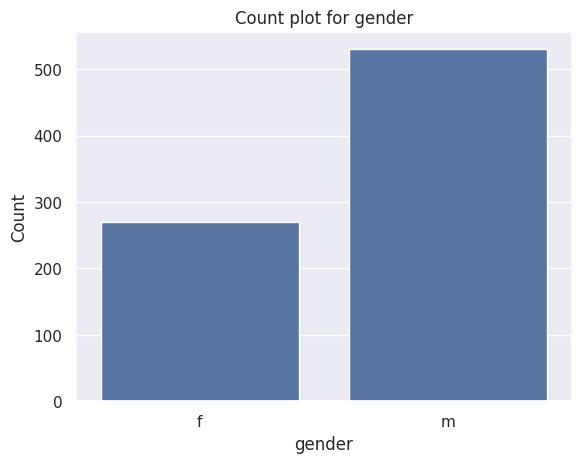

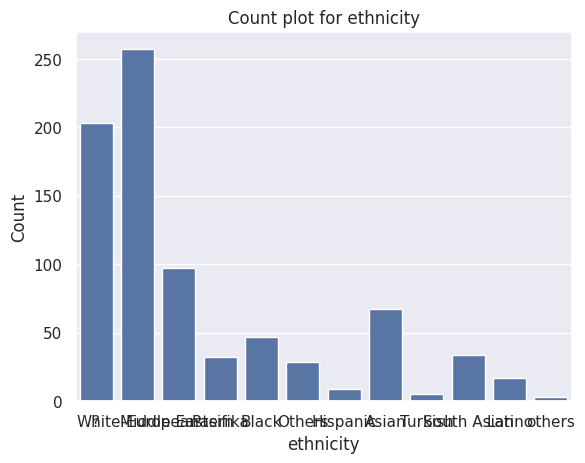

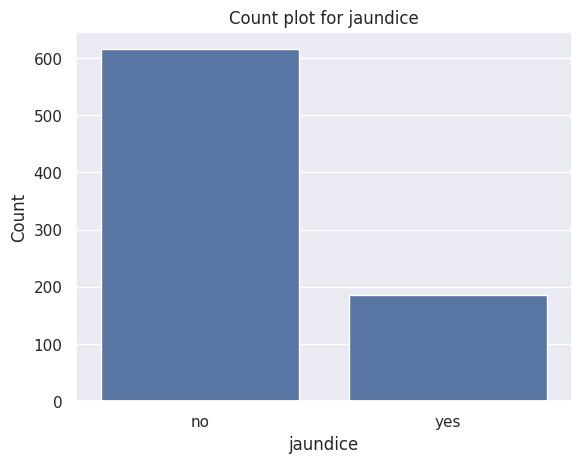

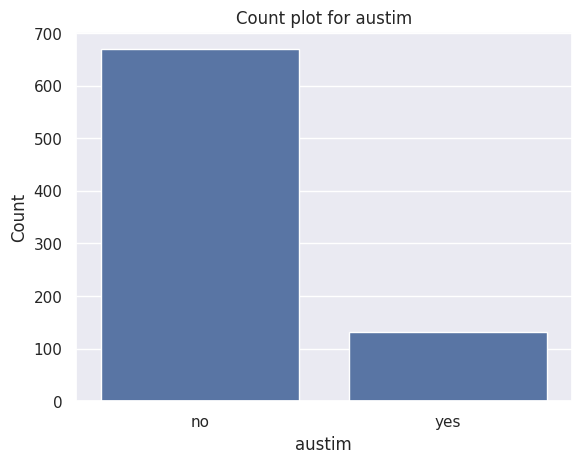

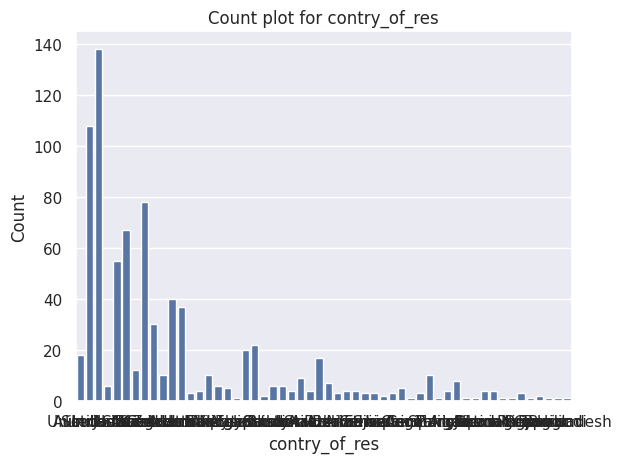

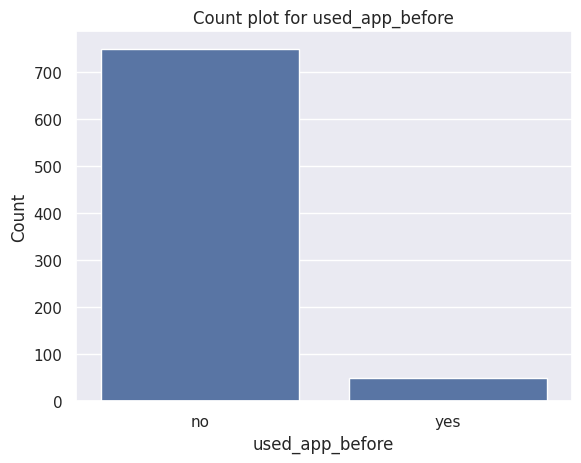

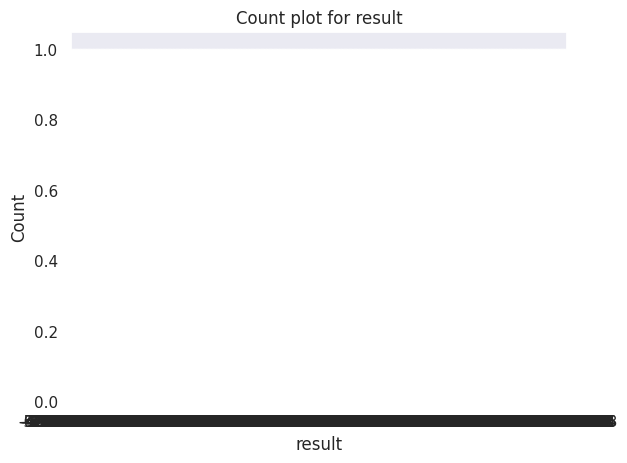

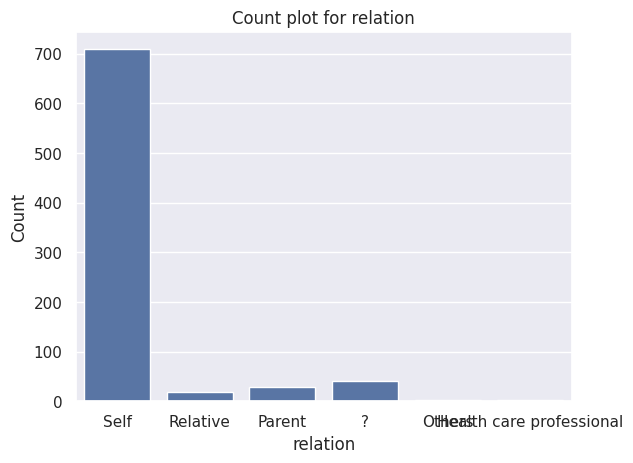

In [22]:
categorical_columns= ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [23]:
df['ethnicity']= df['ethnicity'].replace({"?":"Others", "others": "Others"})

In [24]:
df['relation']= df['relation'].replace({"?":"Others",
                                        "Relative": "Others",
                                        "Parent": "Others",
                                        "Health care professional": "Others"})

In [25]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [26]:
object_col= df.select_dtypes(include=['object']).columns

In [27]:
for column in object_col:
  le= LabelEncoder()
  df[column]= le.fit_transform(df[column])


In [28]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


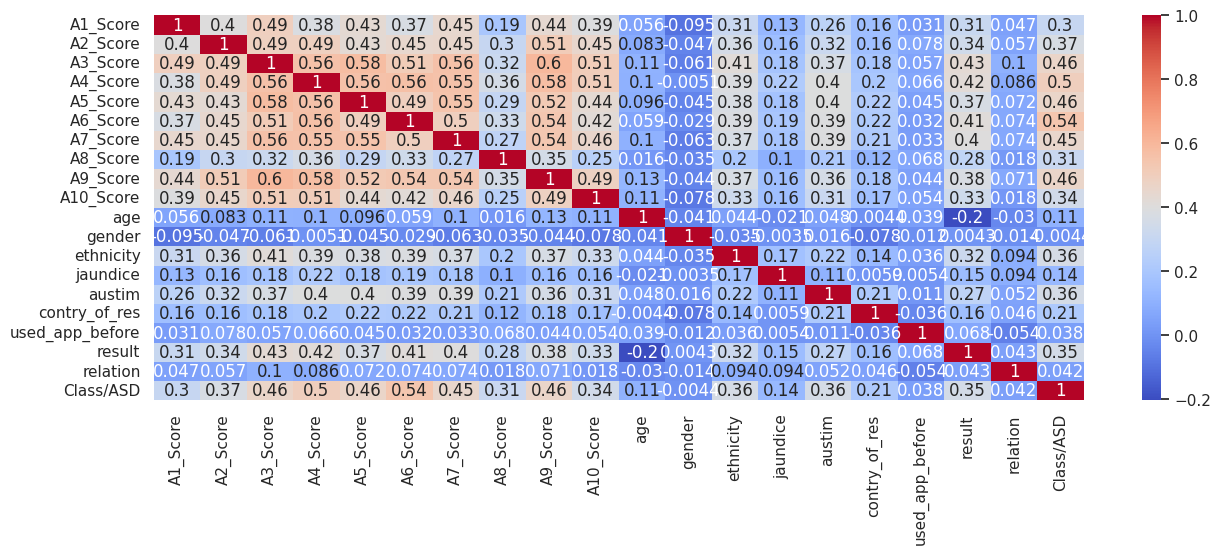

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [30]:
# replacing outliars with the median
def replace_outliers(df, column):
  Q1= df[column].quantile(0.25)
  Q3= df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound= Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR
  median= df[column].median()
  df[column]= df[column].apply(lambda x: median if x<lower_bound or x> upper_bound else x)
  return df

In [32]:
df= replace_outliers(df, 'age')
df= replace_outliers(df, 'result')

In [33]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.0,1,2,0,0,34,0,12.999501,1,0
796,0,1,1,0,0,1,0,1,1,1,20.0,1,9,0,0,16,0,13.561518,1,0
797,0,0,0,0,0,0,0,0,0,0,5.0,1,7,1,0,34,0,2.653177,1,0
798,0,0,0,0,0,0,0,0,0,0,16.0,0,5,0,0,14,0,9.069342,1,0


In [37]:
X= df.drop(columns=['Class/ASD'])
Y= df['Class/ASD']

In [38]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [39]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
smote= SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, Y_train)

In [49]:
y_train_smote.value_counts() # Makes synthetics data points using k Nearest neighbour

,count
Class/ASD,
1,515
0,515


In [50]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [52]:
cv_scores= {}
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores= cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name]= scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.83
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [53]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.84466019, 0.84951456, 0.8592233 , 0.81553398]),
 'Random Forest': array([0.90776699, 0.92718447, 0.90776699, 0.91262136, 0.90776699]),
 'XGBoost': array([0.87864078, 0.91262136, 0.89805825, 0.90776699, 0.91262136])}

Hyper parameter tunnig

In [54]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [62]:
parameter_grid_dt={
    "criterion": ['ginni', 'entropy'],
    "max_depth": [None, 10,20,30,40,70],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

parameter_grid_rf={
    "n_estimators": [50,80,200,500],
    "max_depth": [None,20,40,45],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    'bootstrap': [True, False]
}

parameter_grid_xgb={
    "n_estimators": [50,80,200,500],
    "max_depth": [None,20,40,45],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}




In [63]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=parameter_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=parameter_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=parameter_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [64]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [None, 20, 40, 45],
                                        'n_estimators': [50, 80, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')